In [3]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import gzip

In [4]:
def load_data(file_path):
    with gzip.open(file_path, 'rt') as f:
        data = np.loadtxt(f)
    labels = data[:, 0].astype(int)
    images = data[:, 1:].reshape(-1, 16, 16) / 255.0  # Normalize pixel values
    return images, labels

In [8]:
def load_data(filename):
    with gzip.open(filename, 'rt') as f:
        data = np.loadtxt(f)
    return data[:, 1:], data[:, 0]

def normalize(X):
    return X / 255.0

X_train, y_train = load_data('zip.train.gz')
X_test, y_test = load_data('zip.test.gz')

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

X_train = normalize(X_train)
X_test = normalize(X_test)

# cross val
k_values = range(1, 21)
cv_errors = []
cv_std_errors = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_errors.append(1 - np.mean(scores))
    cv_std_errors.append(np.std(scores) / np.sqrt(5))

(7291, 256) (7291,)
(2007, 256) (2007,)


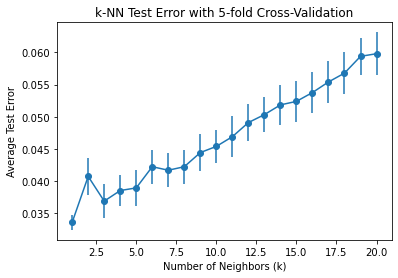

In [7]:
plt.errorbar(k_values, cv_errors, yerr=cv_std_errors, fmt='-o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Average Test Error')
plt.title('k-NN Test Error with 5-fold Cross-Validation')
plt.show()

In [8]:
min_error = min(cv_errors)
min_error_index = cv_errors.index(min_error)
optimal_k = k_values[min_error_index]

In [10]:
for i in range(min_error_index, len(cv_errors)):
    if cv_errors[i] <= min_error + cv_std_errors[i]:
        optimal_k = k_values[i]
        break

print(f"Optimal value of k: {optimal_k}")

Optimal value of k: 1


In [13]:
knn_final = KNeighborsClassifier(n_neighbors=optimal_k)
knn_final.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [14]:
y_pred = knn_final.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[355   0   2   0   0   0   0   1   0   1]
 [  0 255   0   0   6   0   2   1   0   0]
 [  6   1 183   2   1   0   0   2   3   0]
 [  3   0   2 154   0   5   0   0   0   2]
 [  0   3   1   0 182   1   2   2   1   8]
 [  2   1   2   4   0 145   2   0   3   1]
 [  0   0   1   0   2   3 164   0   0   0]
 [  0   1   1   1   4   0   0 139   0   1]
 [  5   0   1   6   1   1   0   1 148   3]
 [  0   0   1   0   2   0   0   4   1 169]]


In [15]:
test_error = 1 - np.trace(conf_matrix) / np.sum(conf_matrix)
print(f"Conditional Test Error: {test_error}")

Conditional Test Error: 0.05630293971101141


In [3]:
# # Load the training and testing data
# X_train, y_train = load_data('zip.train.gz')
# X_test, y_test = load_data('zip.test.gz')

# # Flatten the images for the k-NN algorithm
# X_train_flat = X_train.reshape(X_train.shape[0], -1)
# X_test_flat = X_test.reshape(X_test.shape[0], -1)